<a href="https://colab.research.google.com/github/rizky-gumelar/Fall-Detection-Classification/blob/main/DataSlayer_FixSplit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q mediapipe
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 46.5 MB/s eta 0:00:00


In [ ]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

In [ ]:
import os
import zipfile
zip_path = '/content/drive/MyDrive/DataSlayer/data-slayer-2-0-machine-learning-competition.zip'
extract_path = '/content/dataset'  # Tempat untuk mengekstrak file

# Ekstraksi file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Cek apakah dataset berhasil diekstrak
os.listdir(extract_path)

['train', 'test', 'sample_submission.csv']

In [ ]:
import os
import zipfile
zip_path = '/content/drive/MyDrive/DataSlayer/output_maskss.zip'
extract_path = '/content/'  # Tempat untuk mengekstrak file

# Ekstraksi file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Cek apakah dataset berhasil diekstrak
os.listdir(extract_path)

['.config',
 'dataset',
 'content',
 'pose_landmarker.task',
 'drive',
 'sample_data']

In [ ]:
!mv /content/content/output_masks /content/


In [ ]:
# Membuat direktori untuk training dan testing

extract_path = '/content/output_masks'
train_dir = '/content/data/train'
test_dir = '/content/data/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Dapatkan daftar kelas dari dataset yang diekstrak
classes = os.listdir(extract_path)

# Membuat subfolder berdasarkan kelas di dalam folder training dan testing
for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Memisahkan dataset ke dalam training dan testing
for class_name in classes:
    class_path = os.path.join(extract_path, class_name)
    images = os.listdir(class_path)

    # Membagi data menjadi 80% training dan 20% testing
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Pindahkan file ke folder training
    for img in train_images:
        src_path = os.path.join(class_path, img)
        dest_path = os.path.join(train_dir, class_name, img)
        shutil.move(src_path, dest_path)

    # Pindahkan file ke folder testing
    for img in test_images:
        src_path = os.path.join(class_path, img)
        dest_path = os.path.join(test_dir, class_name, img)
        shutil.move(src_path, dest_path)

Gambar dari dataset training:

Kelas: non_fall


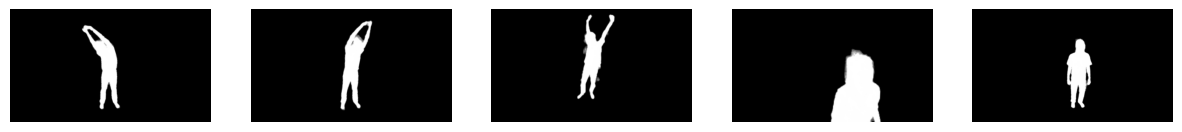


Kelas: fall


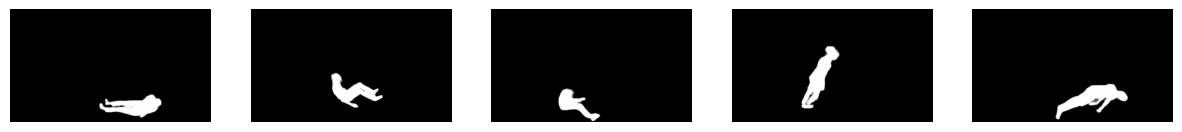

Gambar dari dataset testing:

Kelas: non_fall


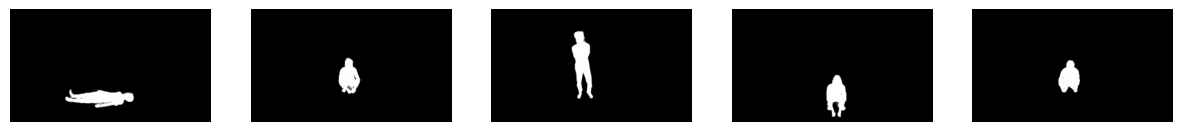


Kelas: fall


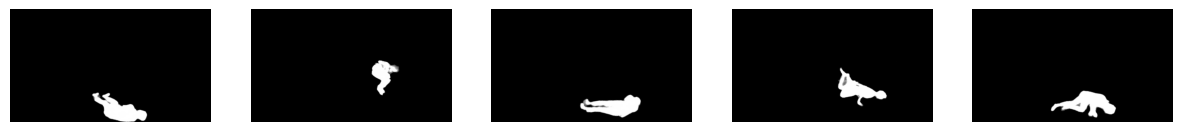

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Fungsi untuk menampilkan beberapa gambar dari setiap kelas
def show_images_from_class(directory, num_images=5):
    classes = os.listdir(directory)

    for class_name in classes:
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            # Ambil beberapa gambar pertama dari setiap kelas
            image_files = os.listdir(class_path)[:num_images]

            # Menampilkan gambar-gambar tersebut
            print(f"\nKelas: {class_name}")
            plt.figure(figsize=(15, 5))

            for i, image_file in enumerate(image_files):
                img_path = os.path.join(class_path, image_file)
                img = Image.open(img_path)

                plt.subplot(1, num_images, i + 1)
                plt.imshow(img)
                plt.axis('off')

            plt.show()

# Tampilkan gambar dari dataset training
print("Gambar dari dataset training:")
show_images_from_class(train_dir)

# Tampilkan gambar dari dataset testing
print("Gambar dari dataset testing:")
show_images_from_class(test_dir)

In [ ]:
import os

# Path ke direktori dataset baru (training dan testing)
train_dir = '/content/data/train'
test_dir = '/content/data/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Menghitung jumlah gambar di setiap kelas pada training data
print("Jumlah gambar di setiap kelas pada training set:")
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"{class_name}: {num_images} gambar")

# Menghitung jumlah gambar di setiap kelas pada testing data
print("\nJumlah gambar di setiap kelas pada testing set:")
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"{class_name}: {num_images} gambar")


Jumlah gambar di setiap kelas pada training set:
non_fall: 2123 gambar
fall: 1223 gambar

Jumlah gambar di setiap kelas pada testing set:
non_fall: 531 gambar
fall: 306 gambar


# **Augmentasi**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalisasi pixel ke [0, 1]
    rotation_range=30,       # Rotasi gambar hingga 40 derajat
    width_shift_range=0.1,   # Geser gambar secara horizontal
    height_shift_range=0.1,  # Geser gambar secara vertikal
    shear_range=0.1,         # Geser sudut gambar
    zoom_range=0.1,          # Zoom gambar
    horizontal_flip=True,    # Membalik gambar secara horizontal
    fill_mode='nearest',     # Mengisi ruang kosong yang dihasilkan dari transformasi
)

# Data generator untuk training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Ubah ukuran gambar sesuai kebutuhan
    batch_size=32,
    class_mode='binary',     # Karena dua kelas
    classes=['non_fall', 'fall']
    # color_mode='grayscale'   # Menggunakan mode grayscale
    # color_mode='rgb'         # Gambar dalam mode RGB
)

# Data generator untuk validasi
val_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    classes=['non_fall', 'fall']
    # color_mode='grayscale'   # Menggunakan mode grayscale
    # color_mode='rgb'         # Gambar dalam mode RGB
)

# Melihat mapping label
print(train_generator.class_indices)



Found 3346 images belonging to 2 classes.
Found 837 images belonging to 2 classes.
{'non_fall': 0, 'fall': 1}


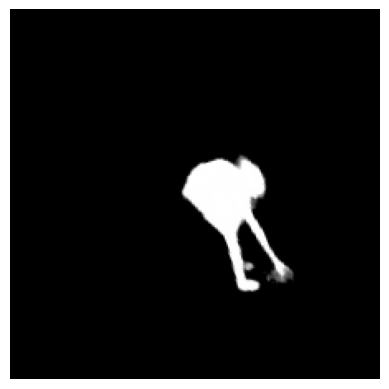

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil satu batch dari generator (training atau validation)
x_batch, y_batch = next(train_generator)  # Anda bisa mengganti train_generator dengan val_generator untuk validasi

# Pilih gambar pertama dari batch (batch size adalah 32, kita ambil gambar pertama)
image = x_batch[0]

# Menampilkan gambar yang sudah diaugmentasi
# plt.imshow(image.reshape(150, 150), cmap='gray')  # Menggunakan cmap='gray' untuk menampilkan grayscale
plt.imshow(image)
plt.axis('off')  # Menghilangkan axis
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

x_batch, y_batch = next(train_generator)
print(f"Tipe x_batch: {type(x_batch)}")  # Pastikan ini numpy array
print(f"Shape x_batch: {x_batch.shape}")  # Harus sesuai dengan ukuran input (misalnya (32, 150, 150, 3))
print(f"Shape y_batch: {y_batch.shape}")  # Sesuai dengan jumlah kelas (misalnya (32, 12))

Tipe x_batch: <class 'numpy.ndarray'>
Shape x_batch: (32, 224, 224, 3)
Shape y_batch: (32,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# # Membuat arsitektur model CNN
# model = models.Sequential([
#     MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
#     layers.Flatten(),
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(128, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(0.5),
#     layers.Dense(1, activation='sigmoid')
# ])

# # Membekukan sebagian besar layer dari MobileNetV2
# preTrainedModel = model.layers[0]
# for layer in preTrainedModel.layers:
#     layer.trainable = False  # Bekukan semua layer

# # Membuat 4 layer terakhir dapat dilatih
# for layer in preTrainedModel.layers[-4:]:
#     layer.trainable = True

# # Compiling model
# model.compile(
#     loss='binary_crossentropy',  # categorical_crossentropy untuk multi-kelas
#     optimizer='adam',
#     metrics=['accuracy']
# )

model = models.Sequential([
    layers.Conv2D(256, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),  # Dropout untuk mengurangi overfitting
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),  # Dropout untuk mengurangi overfitting
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),  # Dropout untuk mengurangi overfitting
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout untuk mengurangi overfitting
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    loss='binary_crossentropy',  # binary_crossentropy untuk 2 kelas
    optimizer='adam',
    metrics=['accuracy']
)

# Ringkasan model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 111, 111, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 128)       │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 52, 52, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 32)          │          36,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,847,009 (10.86 MB)

 Trainable params: 2,847,009 (10.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Melatih model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[early_stopping_callback],
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  5/104 ━━━━━━━━━━━━━━━━━━━━ 39:00 24s/step - accuracy: 0.7047 - loss: 0.6253

In [ ]:
model.save('/content/drive/MyDrive/DataSlayer/95_moblienetV2.h5')

In [ ]:
from tensorflow.keras.models import save_model

save_model(model, '/content/drive/My Drive/DataSlayer/95_moblienetV2.keras')

# Testing Model

## 1

In [ ]:
# Memuat model dari file yang sudah disimpan
from tensorflow.keras.models import load_model
import json

# model_path = '/content/drive/MyDrive/ComVis/SampahKita/sampah_classifier(2class).h5'
# model_path = '/content/drive/MyDrive/ComVis/SampahKita/sampah_classifier(12class).h5'
model_path = '/content/drive/MyDrive/DataSlayer/97_moblienetV2.h5'

model = load_model(model_path)

# Compiling model
model.compile(
    loss='categorical_crossentropy',  # categorical_crossentropy untuk multi-kelas
    optimizer='adam',
    metrics=['accuracy']
)

# Memuat class labels dari file JSON
with open('/content/drive/MyDrive/DataSlayer/class_labels.json', 'r') as json_file:
    class_labels = json.load(json_file)

# Membalik dictionary class_indices untuk mendapatkan label berdasarkan indeks
label_map = {v: k for k, v in class_labels.items()}

# Print label map untuk melihat hasil
print("Label map:", label_map)

Label map: {0: 'fall', 1: 'non-fall'}


In [ ]:
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image

# Fungsi mempersiapkan gambar untuk model (mengambil dari sebelumnya)
def prepare_image(file):
    img = Image.open(file)
    img = img.resize((300, 300))  # Sesuaikan dengan ukuran input model
    img = np.array(img) / 255.0   # Normalisasi nilai piksel
    img = np.expand_dims(img, axis=0)  # Tambahkan batch dimension
    return img

# Misal, kita telah mengunggah gambar
uploaded = files.upload()

# Membuat prediksi
for filename in uploaded.keys():
    processed_img = prepare_image(filename)

    # Menampilkan gambar yang diunggah
    img = Image.open(filename)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    predictions = model.predict(processed_img)

    # Mengambil indeks dengan probabilitas tertinggi
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    print(predicted_class_index)

    # Mengambil nama kelas dari indeks
    predicted_class_label = label_map[predicted_class_index]
    print(f"Gambar {filename} diprediksi sebagai: {predicted_class_label}")


KeyboardInterrupt: 

## 2

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import json
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

model_path = '/content/drive/MyDrive/DataSlayer/95_moblienetV2.h5'

# Memuat class labels dari file JSON
with open('/content/drive/MyDrive/DataSlayer/class_labels.json', 'r') as json_file:
    class_labels = json.load(json_file)

# Membalik dictionary class_indices untuk mendapatkan label berdasarkan indeks
label_map = {v: k for k, v in class_labels.items()}


model = load_model(model_path)

# Compiling model
model.compile(
    loss='categorical_crossentropy',  # categorical_crossentropy untuk multi-kelas
    optimizer='adam',
    metrics=['accuracy']
)

# Muat gambar
img_path = '/content/sada.png'
img = image.load_img(img_path, target_size=(224, 224))  # Ukuran sesuai dengan model

# Konversi gambar ke array NumPy
img_array = image.img_to_array(img)

# Jika perlu, tambahkan dimensi batch (batch size 1)
img_array = np.expand_dims(img_array, axis=0)

# Normalisasi atau pre-processing jika diperlukan (misalnya jika menggunakan model VGG16)
img_array = preprocess_input(img_array)

# Prediksi menggunakan model
predictions = model.predict(img_array)

# Lihat hasil prediksi
print(predictions)

# Menemukan kelas yang diprediksi (misalnya jika model menghasilkan probabilitas kelas)
predicted_class = np.argmax(predictions, axis=1)[0]
print(f'Predicted class: {predicted_class}')

# Mengambil nama kelas dari indeks
predicted_class_label = label_map[predicted_class]
print(f"Gambar {img_path} diprediksi sebagai: {predicted_class_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9724277]]
Predicted class: 0
Gambar /content/sada.png diprediksi sebagai: fall


## model langsung

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Muat gambar
img_path = '/content/data/train/non_fall/frame000.jpg'
img = image.load_img(img_path, target_size=(224, 224))  # Ukuran sesuai dengan model

# Konversi gambar ke array NumPy
img_array = image.img_to_array(img)

# Jika perlu, tambahkan dimensi batch (batch size 1)
img_array = np.expand_dims(img_array, axis=0)

# Normalisasi atau pre-processing jika diperlukan (misalnya jika menggunakan model VGG16)
img_array = preprocess_input(img_array)

# Prediksi menggunakan model
predictions = model.predict(img_array)

# Lihat hasil prediksi
print(predictions)

# Menemukan kelas yang diprediksi (misalnya jika model menghasilkan probabilitas kelas)
predicted_class = np.argmax(predictions, axis=-1)
print(f'Predicted class: {predicted_class}')

# Mengambil nama kelas dari indeks
predicted_class_label = label_map[predicted_class_index]
print(f"Gambar {filename} diprediksi sebagai: {predicted_class_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.9886501]]
Predicted class: [0]
Gambar /content/bfafafafa.png diprediksi sebagai: fall


## Bulk Check

In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the pre-trained model
model_path = '/content/drive/MyDrive/DataSlayer/97_moblienetV2.keras'
model = load_model(model_path)

# Compile model (untuk prediksi saja, mungkin tidak perlu kompilasi lagi)
model.compile(
    loss='categorical_crossentropy',  # categorical_crossentropy untuk multi-kelas
    optimizer='adam',
    metrics=['accuracy']
)

# Function untuk memuat dan memproses gambar
def load_and_process_image(img_path):
    img = image.load_img(img_path, target_size=(300, 300))  # Ukuran sesuai dengan model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Batch size = 1
    img_array = preprocess_input(img_array)  # Jika menggunakan MobileNetV2
    return img_array

# Path folder gambar
folder_path = '/content/dataset/test'  # Ganti dengan path folder Anda

# List untuk menyimpan hasil prediksi
results = []

# Iterasi melalui semua file dalam folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Cek apakah file adalah gambar
    if filename.lower().endswith(('png', 'jpg', 'jpeg')):
        print(f'Processing: {filename}')

        # Load dan proses gambar
        img_array = load_and_process_image(file_path)

        # Prediksi menggunakan model
        predictions = model.predict(img_array)

        # Menentukan kelas yang diprediksi (misalnya label 0 atau 1)
        predicted_class = np.argmax(predictions, axis=-1)[0]

        # Simpan hasil prediksi
        results.append({
            'id': filename,  # Nama file gambar sebagai ID
            'label': int(predicted_class)  # Label 0 atau 1
        })

# Convert hasil ke DataFrame
results_df = pd.DataFrame(results)

# Simpan hasil ke CSV
output_csv_path = '/content/predictions.csv'
results_df.to_csv(output_csv_path, index=False)

print(f'Predictions saved to {output_csv_path}')


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 15 variables whereas the saved optimizer has 28 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Processing: f949cd3b02.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Processing: fa7efaa482.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Processing: 0fc0f3fe24.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Processing: 2297123d87.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Processing: aaa23e214a.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Processing: c515d7057a.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Processing: 42250d6d18.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Processing: a4ad62c721.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Processing: 8db8680806.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Processing: b3857db71a.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Processing: dd0a309a5f.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Processing: 244a426a24.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Processing: ae8c20ce56.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Processing: 6b9fa95e31.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Processing: c70fc39660.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Processing: 9997cccd02.jpg
1/1 ━━━━━━━━━